# Supervised Learning Methods: A Concise Reference  


1. **K-Nearest Neighbors (K-NN)**  
2. **Tree-Based Models**  
3. **Bagging & the Random Forest**  
4. **Boosting**  

---

## 1 K-Nearest Neighbors (K-NN)

**Idea** – predict the label of a query point **x** by looking at the *k* nearest training samples in feature space.

**Distance (Euclidean)**   
$d(\mathbf{x},\mathbf{x_i}) = \left( \sum_{j=1}^{p} (x_j - x_{ij})^{2} \right)^{1/2}$  

**Classification rule**   
$\hat{y} = \arg\max_{c \in \mathcal{C}} \sum_{i \in \mathcal{N}_k(\mathbf{x})} \mathbf{1}\!\{y_i = c\}$  

**Regression rule**   
$\hat{y} = \dfrac{1}{k} \sum_{i \in \mathcal{N}_k(\mathbf{x})} y_i$  

*Non-parametric, requires feature scaling, trades bias vs. variance via $k$, and suffers from the curse of dimensionality.*



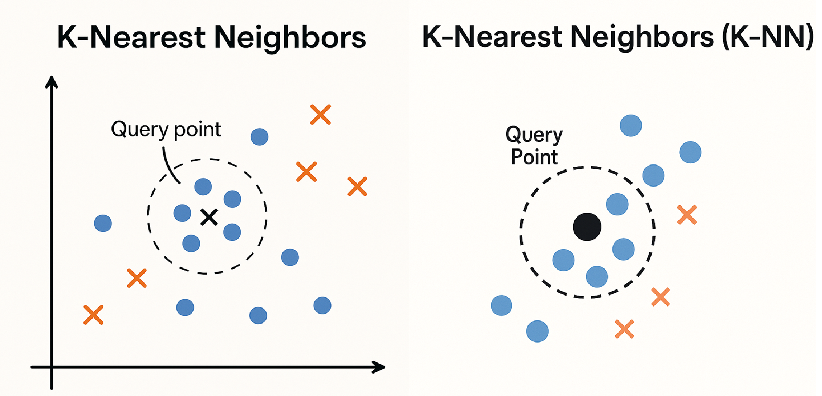

---

## 2 Tree-Based Models

A decision tree recursively partitions the feature space into axis-aligned regions and predicts a constant value in each region.

| Splitting Criterion | Formula (node *t*) |
|---------------------|--------------------|
| **Entropy** | $H(t) = -\sum_{c} p_{c,t}\,\log_2 p_{c,t}$ |
| **Gini** | $G(t) = 1 - \sum_{c} p_{c,t}^{2}$ |
| **Variance reduction (reg.)** | $\Delta \sigma^{2} = \sigma^{2}(t) - \bigl[\tfrac{n_L}{n}\sigma^{2}(t_L) + \tfrac{n_R}{n}\sigma^{2}(t_R)\bigr]$ |

**CART cost-complexity pruning**   
$C_{\alpha}(T) = \sum_{t \in T} N_t \,\text{Impurity}(t) + \alpha\,|T|$

Trees are **interpretable** but high variance; ensembles mitigate overfitting.






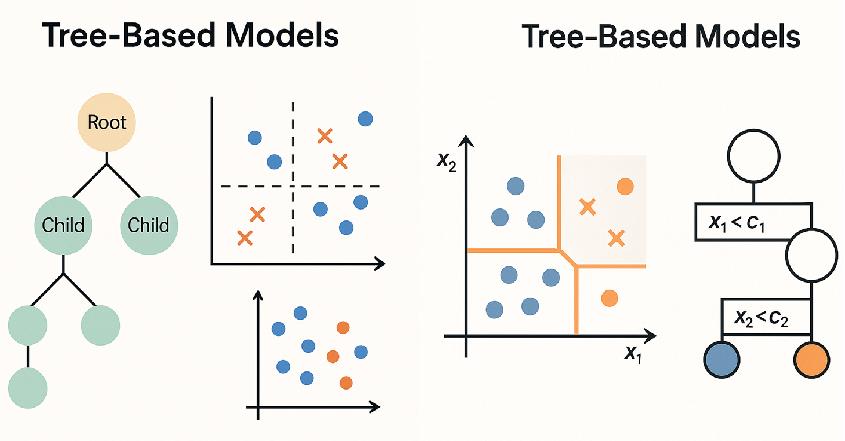

---

## 3 Bagging & the Random Forest

### Bagging (Bootstrap Aggregating)

1. Draw $B$ bootstrap samples $\mathcal{D}_1,\dots,\mathcal{D}_B$.  
2. Train high-variance learner $g_b(\mathbf{x})$ on each $\mathcal{D}_b$.  
3. Aggregate  
   *Classification* $\hat{y} = \operatorname{majority}_{b} g_b(\mathbf{x})$  
   *Regression*    $\hat{y} = \tfrac{1}{B}\sum_{b} g_b(\mathbf{x})$

Variance reduction (regression): $\operatorname{Var}[\hat{y}] = \tfrac{1}{B}\rho\sigma^{2} + \bigl(1-\tfrac{1}{B}\bigr)\sigma^{2}$ where $\rho$ is the average pairwise correlation of base learners.

### Random Forest (RF)

Adds **feature randomness**: at each split, choose the best split among $m < p$ randomly selected predictors.  

Class probability estimate: $\hat{P}(Y=c\mid\mathbf{x}) = \tfrac{1}{B} \sum_{b=1}^{B} \mathbf{1}\!\{g_b(\mathbf{x}) = c\}$  

**Out-of-Bag (OOB) error** uses samples left out of each bootstrap (~$36.8\%$) for unbiased validation.





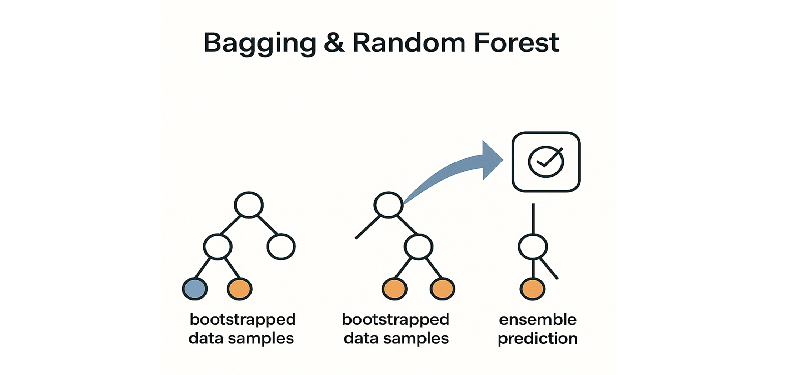

---

## 4 Boosting

Build an additive model by sequentially fitting weak learners to residuals.

General form: $\hat{f}_M(\mathbf{x}) = \sum_{m=1}^{M} \gamma_m\,h_m(\mathbf{x})$

### 4.1 AdaBoost (binary)

* Initialize weights $w_i^{(1)} = 1/n$.  
* For $m=1,\dots,M$:  
  * Fit $h_m$ minimizing weighted error $\varepsilon_m = \sum_i w_i^{(m)}\mathbf{1}\!\{y_i \neq h_m(\mathbf{x_i})\}$  
  * $\alpha_m = \tfrac{1}{2}\ln\bigl(\tfrac{1-\varepsilon_m}{\varepsilon_m}\bigr)$  
  * Update $w_i^{(m+1)} = w_i^{(m)}\exp\!\bigl(-\alpha_m y_i h_m(\mathbf{x_i})\bigr)$ and renormalize  
* Final prediction: $\hat{y} = \operatorname{sign}\!\bigl(\sum_{m=1}^{M}\alpha_m h_m(\mathbf{x})\bigr)$

### 4.2 Gradient Boosting

Fit $h_m$ to negative gradients $r_i^{(m)} = -\bigl[\partial \mathcal{L}(y_i,f(\mathbf{x_i}))/\partial f(\mathbf{x_i})\bigr]_{f=\hat{f}_{m-1}}$ of a chosen loss $\mathcal{L}$, then update  
$\hat{f}_{m}(\mathbf{x}) = \hat{f}_{m-1}(\mathbf{x}) + \nu\,\gamma_m h_m(\mathbf{x})$ with learning rate $\nu \in (0,1]$.

Popular libraries: XGBoost, LightGBM, CatBoost.

| Pros | Cons |
|------|------|
| Converts weak to strong learners; flexible loss; high accuracy | Sensitive to noise; can overfit; sequential (less parallel) |



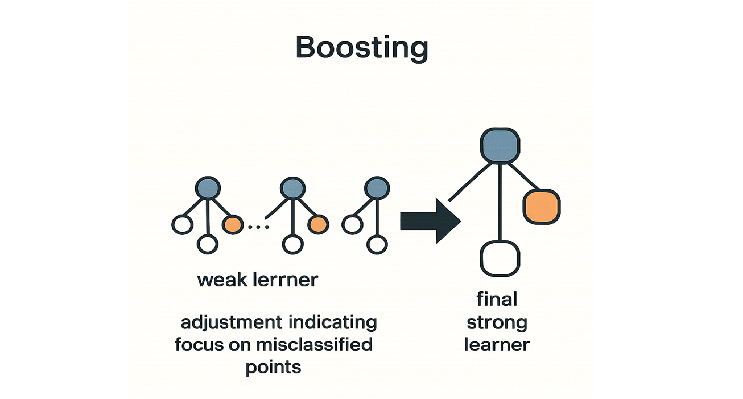

---

### Further Reading

* Hastie, Tibshirani & Friedman (2009) — *The Elements of Statistical Learning*  
* Breiman (2001) — “Random Forests”  
* Freund & Schapire (1997) — “AdaBoost”  
* Friedman (2001) — “Greedy Function Approximation: A Gradient Boosting Machine”  

---